In [1]:
#Shaquiel Pashtunyar
#DSC550 Final Project

In [2]:
#combining the data from the last three milestones

In [88]:
#Milestone 1
import pandas as pd

In [89]:
#importing
Trends = pd.read_csv('Annual_Macroeconomic_Factors.csv')

In [5]:
Trends.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

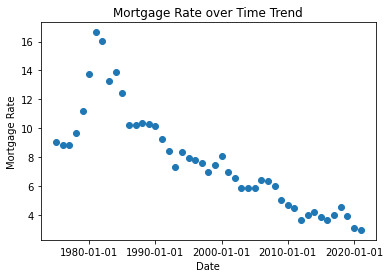

In [7]:
plt.scatter(Trends['Date'], Trends['Mortgage_Rate'])
plt.xlabel('Date')
plt.ylabel('Mortgage Rate')
plt.title('Mortgage Rate over Time Trend')
x_ticks = [5, 15, 25, 35, 45]
plt.xticks(ticks=x_ticks)
plt.show()

In [8]:
# The first plot we are seeing is just showing the mortgage rate over time. We can see it get to an all time low in 2021. We also see it get to al alol time high in 1981. Prices of homes should be the lowest there if there is a coorelation

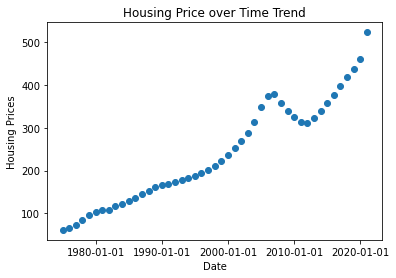

In [9]:
plt.scatter(Trends['Date'], Trends['House_Price_Index'])
plt.xlabel('Date')
plt.ylabel('Housing Prices')
plt.title('Housing Price over Time Trend')
x_ticks = [5, 15, 25, 35, 45]
plt.xticks(ticks=x_ticks)
plt.show()

In [10]:
# This trend is quite informative, because we see a steady growth of prices in the 80s, 90s, and early 2000s. It wasnt until the housing market crash of 2008 that we see a 5 year dip in the price index. This isn't as consistant as the downward trend of mortgage rates.

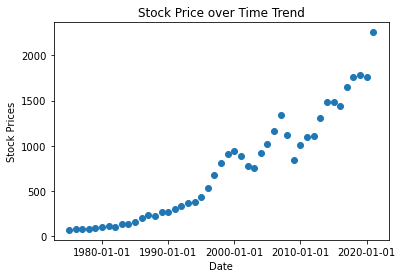

In [11]:
plt.scatter(Trends['Date'], Trends['Stock_Price_Index'])
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('Stock Price over Time Trend')
x_ticks = [5, 15, 25, 35, 45]
plt.xticks(ticks=x_ticks)
plt.show()

In [12]:
#Stock prices have grown over the last 45 years, and weathered two pullbacks/recessions. This is not in the same timeline as the pricing index that just continuously went up over a 30 year period. It also shows the housing market having no issue with the 2001 dot come bubble. People may have lost their money in the market but they didnt lose value in their homes.

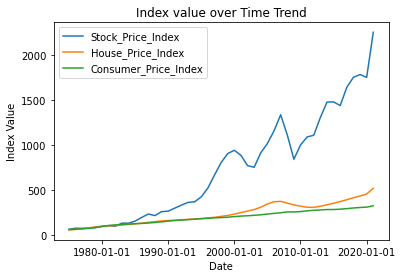

In [13]:
plt.plot(Trends['Date'], Trends['Stock_Price_Index'], label='Stock_Price_Index')
plt.plot(Trends['Date'], Trends['House_Price_Index'], label='House_Price_Index')
plt.plot(Trends['Date'], Trends['Consumer_Price_Index'], label='Consumer_Price_Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Index value over Time Trend')
x_ticks = [5, 15, 25, 35, 45]
plt.xticks(ticks=x_ticks)
plt.legend()
plt.show()

In [14]:
#this final chart shows the index values over time. It does seem the consumer price index has steadily gone up each year, this may be due to inflation, but doesn't follow the housing market curve. Same with the stock price index.

In [15]:
#From this initial analysis I can see that it is more than one varibale here that may or may not hold weight. I can see that the housing market has an effect on the stock market, but I am not sure that it goes the other way around

In [16]:
#Next we can take the log scales of the index values, or look at other values to understand them better. We can also start comparing each value to see if there is a coorelation or one that is more likely to have an effect on the other. 

In [17]:
#We Also need to bring in other housing data sets, we may want to see the trend of inflation year after year as a comparison, or the ammount of immigration as well

In [18]:
#Milestone 2

In [19]:
#finding the data types
Trends.dtypes

Date                       object
House_Price_Index         float64
Stock_Price_Index         float64
Consumer_Price_Index      float64
Population                float64
Unemployment_Rate         float64
Real_GDP                  float64
Mortgage_Rate             float64
Real_Disposable_Income    float64
dtype: object

In [20]:
#Data types look good for the analysis we plan to do so no manipulation is needed here

In [21]:
# we want to find which variable is the most coorelated to housing prices, to find the variables we want to use in our model
#our y is HOUSE_PRICE_INDEX

In [22]:
 import numpy as np

In [23]:
Trends.corr()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
House_Price_Index,1.000000,0.969546,0.969244,-0.615552,-0.339527,0.980220,-0.834767,0.986553
Stock_Price_Index,0.969546,1.000000,0.950569,-0.656950,-0.393546,0.971103,-0.842434,0.973682
Consumer_Price_Index,0.969244,0.950569,1.000000,-0.551374,-0.306713,0.991167,-0.852521,0.988868
Population,-0.615552,-0.656950,-0.551374,1.000000,0.067934,-0.587978,0.422529,-0.596869
Unemployment_Rate,-0.339527,-0.393546,-0.306713,0.067934,1.000000,-0.354710,0.316395,-0.335303
Real_GDP,0.980220,0.971103,0.991167,-0.587978,-0.354710,1.000000,-0.878215,0.995385
Mortgage_Rate,-0.834767,-0.842434,-0.852521,0.422529,0.316395,-0.878215,1.000000,-0.873526
Real_Disposable_Income,0.986553,0.973682,0.988868,-0.596869,-0.335303,0.995385,-0.873526,1.000000


In [24]:
print("Biggest correlating factors to House price is Stock price, consumer price index, REAL GDP, and Real Disposable Income")

Biggest correlating factors to House price is Stock price, consumer price index, REAL GDP, and Real Disposable Income


In [25]:
CleanedData = Trends.drop(["Population", "Unemployment_Rate", "Mortgage_Rate"], axis =1)

In [26]:
#Removing low coorelating factors to have a strong data set
CleanedData.corr()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Real_GDP,Real_Disposable_Income
House_Price_Index,1.000000,0.969546,0.969244,0.980220,0.986553
Stock_Price_Index,0.969546,1.000000,0.950569,0.971103,0.973682
Consumer_Price_Index,0.969244,0.950569,1.000000,0.991167,0.988868
Real_GDP,0.980220,0.971103,0.991167,1.000000,0.995385
Real_Disposable_Income,0.986553,0.973682,0.988868,0.995385,1.000000


In [27]:
#From the quick coorelation study, If I had to make a bet, I would bet disposable income is the strongest predictor to nearly all the other factors. The more money we have to spend the higher the prices and stock and GDP

In [28]:
#running a quick check to see if I have a complete data set
percent_missing = CleanedData.isnull().sum() * 100 / len(CleanedData)
missing_value_df = pd.DataFrame({'column_name': CleanedData.columns,
                                 'percent_missing': percent_missing})

In [29]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [30]:
missing_value_df

,column_name,percent_missing
Date,Date,0.0
House_Price_Index,House_Price_Index,0.0
Stock_Price_Index,Stock_Price_Index,0.0
Consumer_Price_Index,Consumer_Price_Index,0.0
Real_GDP,Real_GDP,0.0
Real_Disposable_Income,Real_Disposable_Income,0.0


In [31]:
#From the missing values dataframe I created I can see that there are no missing values in the columns I selected so this data is good to go

In [32]:
#My first data set is complete, I have removed the bad columns and the data looks strong.

In [33]:
 CleanedData.iloc[-1]

Date                      2021-01-01
House_Price_Index             523.26
Stock_Price_Index          2255.8437
Consumer_Price_Index       328.81353
Real_GDP                   19427.287
Real_Disposable_Income       48219.0
Name: 46, dtype: object

In [34]:
#loading second dataset on California Housing to clean
CaliHousing = pd.read_csv('CAHousing.csv')

In [35]:
CaliHousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
#Step one is checking for missing rows

In [37]:
#running a quick check to see if I have a complete data set
percent_missing2 = CaliHousing.isnull().sum() * 100 / len(CaliHousing)
missing_value_df2 = pd.DataFrame({'column_name': CaliHousing.columns,
                                 'percent_missing': percent_missing2})

In [38]:
missing_value_df2.sort_values('percent_missing', inplace=True)

In [39]:
#Total Bedrooms is missing some values, we either remove those, mark them as NA or drop the column
missing_value_df2

,column_name,percent_missing
longitude,longitude,0.000000
latitude,latitude,0.000000
housing_median_age,housing_median_age,0.000000
total_rooms,total_rooms,0.000000
population,population,0.000000
households,households,0.000000
median_income,median_income,0.000000
median_house_value,median_house_value,0.000000
ocean_proximity,ocean_proximity,0.000000
total_bedrooms,total_bedrooms,1.002907


In [40]:
#Look for coorelating factos to median house value
CaliHousing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [41]:
#it isnt the strongest but we do see median income and household as stronger factors to the home price, this is similar to the other dataset. More disposable income comes from more general income

In [42]:
CaliHousingCleaned = CaliHousing.drop(["housing_median_age", "total_rooms", "total_bedrooms", "population"], axis=1)

In [43]:
print("We now have a cleaned dataset with communitys in california and the income of the community, number of houses, and the value. As well as the geographic location")
CaliHousingCleaned

We now have a cleaned dataset with communitys in california and the income of the community, number of houses, and the value. As well as the geographic location


,longitude,latitude,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...
20635,-121.09,39.48,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,349.0,1.8672,84700.0,INLAND


In [44]:
#Get the geom by combining Long and Lat, having two columns as an identifier for location makes grouping difficult. We want one variable to denote the location of the community that we can group on, we can use geopy to get the city name, but this seems to crash quite a bit for me

In [45]:
from geopy.geocoders import Nominatim
from geopy.point import Point

In [46]:
CaliHousingCleaned['geom'] = CaliHousingCleaned.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)
CaliHousingCleaned.geom

0        (37.88, -122.23)
1        (37.86, -122.22)
2        (37.85, -122.24)
3        (37.85, -122.25)
4        (37.85, -122.25)
               ...       
20635    (39.48, -121.09)
20636    (39.49, -121.21)
20637    (39.43, -121.22)
20638    (39.43, -121.32)
20639    (39.37, -121.24)
Name: geom, Length: 20640, dtype: object

In [47]:
#Drop long and lat as they are not needed anymore
CaliHousingCleaned = CaliHousingCleaned.drop(["longitude","latitude"],axis=1)

In [48]:
#checking values in ocean proximity to see if there is any changes needed
CaliHousingCleaned['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [49]:
#5 data types, we may want to split these out and see if there is coorelation between them, a pivot can be used here

In [50]:
#Create a pivot on geom and ocean_proximity
CaliHousingPivot = CaliHousingCleaned.pivot_table(index = ['geom','ocean_proximity'])

In [51]:
CaliHousingPivot

,,households,median_house_value,median_income
geom,ocean_proximity,,,
"(32.54, -117.04)",NEAR OCEAN,282.0,67500.0,1.2667
"(32.55, -117.04)",NEAR OCEAN,648.0,93200.0,1.6348
"(32.55, -117.06)",NEAR OCEAN,854.0,108800.0,1.4384
"(32.55, -117.09)",NEAR OCEAN,1177.0,144400.0,3.9583
"(32.56, -116.97)",NEAR OCEAN,275.0,153300.0,2.5625
...,...,...,...,...
"(41.86, -123.26)",INLAND,424.0,64600.0,2.7222
"(41.88, -123.83)",<1H OCEAN,258.0,116700.0,3.1300
"(41.92, -124.16)",NEAR OCEAN,283.0,75000.0,2.1336


In [52]:
print("We now have groupings for the location and ocean proximity, which may or may not be variables. We also have the number of households in a community, the value and income of those areas. This is a cleaned dataset with no missing values that we can experiement with in the next step")


We now have groupings for the location and ocean proximity, which may or may not be variables. We also have the number of households in a community, the value and income of those areas. This is a cleaned dataset with no missing values that we can experiement with in the next step


In [53]:
#Adding dummy data for ocean proximity
CaliHousingCleaned = CaliHousingCleaned.drop(["geom",],axis=1)

In [54]:
CaliHousingCleaned = pd.get_dummies(CaliHousingCleaned,columns =['ocean_proximity'])

In [55]:
CaliHousingCleaned

,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,126.0,8.3252,452600.0,0,0,0,1,0
1,1138.0,8.3014,358500.0,0,0,0,1,0
2,177.0,7.2574,352100.0,0,0,0,1,0
3,219.0,5.6431,341300.0,0,0,0,1,0
4,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
20635,330.0,1.5603,78100.0,0,1,0,0,0
20636,114.0,2.5568,77100.0,0,1,0,0,0
20637,433.0,1.7000,92300.0,0,1,0,0,0
20638,349.0,1.8672,84700.0,0,1,0,0,0


In [56]:
#I now have two data sets. Both show a coorelation with median income to house value in a location 
print(CaliHousingCleaned.head())
print(CleanedData.head())

   households  median_income  median_house_value  ocean_proximity_<1H OCEAN  \
0       126.0         8.3252            452600.0                          0   
1      1138.0         8.3014            358500.0                          0   
2       177.0         7.2574            352100.0                          0   
3       219.0         5.6431            341300.0                          0   
4       259.0         3.8462            342200.0                          0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                 

In [57]:
#Making even number
CleanedData = CleanedData.drop([0])

In [58]:
print("Because the values are generally coorelated and I have dropped the non-coorelated columns, I will perform a linear regression on both data sets where y is the median income, or disposable income, depending on the data set")

Because the values are generally coorelated and I have dropped the non-coorelated columns, I will perform a linear regression on both data sets where y is the median income, or disposable income, depending on the data set


In [59]:
#From the cleaned data set, I will take real disposable income as my target
Y = (CleanedData["Real_Disposable_Income"])

In [60]:
#the model selection train test split allows me to split my data into two sets, there will be a test set and a training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CleanedData, Y, test_size=0.5)

In [61]:
#I am loading the linear regressions package
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [62]:
#For naming consistancy I will change target to y_train so I know what my target is
target = y_train

In [63]:
#From my split data the training data is housing price, we want to see if housing price can be used to predict income
feature = X_train['House_Price_Index'].values.reshape(-1, 1)

In [64]:
X_test = X_test['House_Price_Index'].values.reshape(-1, 1)

In [65]:
#Running my regression
model1 =regression.fit(feature,target)

In [66]:
#Once the reggression is complete we can see the model intercept and coef 
print(model1.intercept_)
print(model1.coef_)

15972.610406448788
[66.80475624]


In [67]:
#The feature prediction below is the goal. This is my model using the data below in order to predict the disposable income level
model1.predict(feature)

array([36800.66328244, 21567.17471757, 38616.08253319, 45219.73268728,
       31743.20921147, 20878.41768076, 35120.52366306, 20349.99205892,
       41242.51152468, 23738.1622834 , 27281.15253046, 24501.07259964,
       22327.91387923, 22831.28771748, 24086.54908718, 33996.19961558,
       32922.64718284, 42458.69211198, 28541.75828067, 39293.81678522,
       38670.02737386, 41090.69771613, 27069.71547697])

In [68]:
#This will be my prediction
y_pred = model1.predict(feature)

In [69]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
#Calculating MAE, MSE,RMSE to find some accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [71]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 10392.23
Mean squared error: 161387001.24
Root mean squared error: 12703.82


In [72]:
print("What this tells me is that I am able to predict income within a range of about 10000 off the true value")

What this tells me is that I am able to predict income within a range of about 10000 off the true value


In [73]:
print("R2 for the Linear Regression is :",model1.score(X_test,y_test))

R2 for the Linear Regression is : 0.9690151432424027


In [74]:
print("95% Is a pretty good model to say income relates to house prices")

95% Is a pretty good model to say income relates to house prices


In [75]:
#Repeating study on just California data
Y2 = (CaliHousingCleaned["median_income"])

In [76]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(CaliHousingCleaned, Y2, test_size=0.5)

In [77]:
target2 = y_train2

In [78]:
feature2 = X_test2['median_house_value'].values.reshape(-1, 1)

In [79]:
X_test2 = X_test2['median_house_value'].values.reshape(-1, 1)

In [80]:
#Running my regression
model2 = regression.fit(feature2,target2)

In [81]:
#Once the reggression is complete we can see the model intercept and coef 
print(model2.intercept_)
print(model2.coef_)

3.8273633152608197
[1.02460811e-07]


In [82]:
#This will be my prediction
y_pred2 = model2.predict(feature2)
y_pred2

array([3.84393123, 3.84254801, 3.85849091, ..., 3.87859382, 3.85279409,
       3.85557078])

In [83]:
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse)

In [84]:
print(f'Mean absolute error: {mae2:.2f}')
print(f'Mean squared error: {mse2:.2f}')
print(f'Root mean squared error: {rmse2:.2f}')

Mean absolute error: 1.40
Mean squared error: 3.64
Root mean squared error: 12703.82


In [85]:
print("What this tells me is that I am able to predict income within a range of about 10000 off the true value, that is suprisingly similar in both cases")

What this tells me is that I am able to predict income within a range of about 10000 off the true value, that is suprisingly similar in both cases


In [86]:
print("R2 for the Linear Regression is :",model2.score(X_test2,y_test2))

R2 for the Linear Regression is : 0.0080780440769197


In [87]:
print("When looking at just the california data, I do not get the same level of fit as the national one. This is likely due to the other factors in Caliornia")

When looking at just the california data, I do not get the same level of fit as the national one. This is likely due to the other factors in Caliornia
